In [1]:
import ipynbname
data_dir = ipynbname.path().parent / 'data'
print(data_dir)
# read it in to inspect it
with open(data_dir / 'input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

c:\Users\16072\Desktop\DeepLearning\gpt-dev\data


In [2]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  1115394


In [3]:
# let's look at the first 1000 characters
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [4]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [5]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }  # character to integer
itos = { i:ch for i,ch in enumerate(chars) }  # integer to character
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("hii there"))
print(decode(encode("hii there")))

[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


In [6]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
# print(data[:1000])  # first 1000 characters encoded as integers

torch.Size([1115394]) torch.int64


In [7]:
train_ratio = 0.9
n = int(train_ratio * len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [8]:
block_size = 8
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context.tolist()} the target: {target}")

when input is [18] the target: 47
when input is [18, 47] the target: 56
when input is [18, 47, 56] the target: 57
when input is [18, 47, 56, 57] the target: 58
when input is [18, 47, 56, 57, 58] the target: 1
when input is [18, 47, 56, 57, 58, 1] the target: 15
when input is [18, 47, 56, 57, 58, 1, 15] the target: 47
when input is [18, 47, 56, 57, 58, 1, 15, 47] the target: 58


In [9]:
torch.manual_seed(1337)
batch_size = 64  # how many independent sequences will we process in parallel?
block_size = 256  # what is the maximum context length for predictions?

n_embd = 384
n_head = 6
n_layer = 6
dropout = 0.2
lr = 3e-4

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

xb, yb = get_batch('train') 
print('inputs:')
print(xb)
print('targets:') 
print(yb)

for b in range(batch_size):
    for t in range(block_size):
        context = xb[b,:t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

inputs:
tensor([[ 0, 26, 53,  ..., 56, 43, 47],
        [60, 43, 56,  ..., 56,  1, 41],
        [26, 21, 33,  ..., 26, 21, 13],
        ...,
        [ 5, 57,  1,  ...,  1, 35, 47],
        [56, 53, 53,  ..., 59, 50, 42],
        [42, 47, 56,  ..., 39, 56,  1]], device='cuda:0')
targets:
tensor([[26, 53, 58,  ..., 43, 47, 45],
        [43, 56,  1,  ...,  1, 41, 53],
        [21, 33, 31,  ..., 21, 13, 10],
        ...,
        [57,  1, 52,  ..., 35, 47, 50],
        [53, 53, 58,  ..., 50, 42,  1],
        [47, 56, 43,  ..., 56,  1, 51]], device='cuda:0')
when input is [0] the target: 26
when input is [0, 26] the target: 53
when input is [0, 26, 53] the target: 58
when input is [0, 26, 53, 58] the target: 1
when input is [0, 26, 53, 58, 1] the target: 19
when input is [0, 26, 53, 58, 1, 19] the target: 50
when input is [0, 26, 53, 58, 1, 19, 50] the target: 53
when input is [0, 26, 53, 58, 1, 19, 50, 53] the target: 59
when input is [0, 26, 53, 58, 1, 19, 50, 53, 59] the target: 41
when i

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(1337)

class Head(nn.Module):
    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B, T, C = x.shape
        k = self.key(x)   # (B,T,head_size)
        q = self.query(x) # (B,T,head_size)

        wei = q @ k.transpose(-2, -1) * C**-0.5  # (B,T,T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        wei = F.softmax(wei, dim=-1)  # (B,T,T)
        wei = self.dropout(wei)

        v = self.value(x) # (B,T,head_size)
        out = wei @ v  # (B,T,head_size)

        return out

class MultiHeadAttention(nn.Module):
    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
    
    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.proj(out)
        return out

class FeedForward(nn.Module):
    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )
    
    def forward(self, x):
        return self.net(x)   

class Block(nn.Module):
    def __init__(self, n_embd, n_head):
        super().__init__()
        head_size = n_embd // n_head
        self.sa_head = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedForward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa_head(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x 

class BigramLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head = n_head) for _ in range(n_layer)])

        self.sa_head = MultiHeadAttention(4, n_embd // 4)
        self.ffwd = FeedForward(n_embd)
        self.lm_head = nn.Linear(n_embd, vocab_size)



    def forward(self, idx, targets=None):
        B, T = idx.shape
        tok_emb = self.token_embedding_table(idx)  # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device))  # (T,C)
        x = tok_emb + pos_emb  # (B,T,C)
        # x = self.sa_head(x)
        # x = self.ffwd(x)
        x = self.blocks(x)
        logits = self.lm_head(x)  # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
    
            loss = F.cross_entropy(logits, targets)

        return logits, loss
    
    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            #crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            logits, _ = self(idx_cond)

            # logits, _ = self(idx)
            # print(idx, logits.shape)
            # focus only on the last time step
            logits = logits[:, -1, :]  # becomes (B, C)
            probs = F.softmax(logits, dim=-1)  # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1)  # (B, 1)
            idx = torch.cat((idx, idx_next), dim=1)  # append sampled index to the running sequence
        return idx
    
model = BigramLanguageModel()
m = model.to(device)
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)

eval_iters = 200
@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

torch.Size([16384, 65])
tensor(4.5955, device='cuda:0', grad_fn=<NllLossBackward0>)


In [11]:
idx = torch.zeros((1, 1), dtype=torch.long).to(device)
print(idx.shape)
# print(decode(m.generate(idx = idx, max_new_tokens=100)[0].tolist()))

torch.Size([1, 1])


In [12]:
optimizer = torch.optim.AdamW(m.parameters(), lr=lr)

In [13]:
max_iters = 5000

for steps in range(max_iters):

    if steps % eval_iters == 0:
        losses = estimate_loss()
        print(f"step {steps}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
    #sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())
    

step 0: train loss 4.5771, val loss 4.5685
step 200: train loss 2.4472, val loss 2.4743
step 400: train loss 2.2727, val loss 2.3087
step 600: train loss 1.9494, val loss 2.0395
step 800: train loss 1.7682, val loss 1.9065
step 1000: train loss 1.6433, val loss 1.8010
step 1200: train loss 1.5677, val loss 1.7427
step 1400: train loss 1.4951, val loss 1.6796
step 1600: train loss 1.4430, val loss 1.6397
step 1800: train loss 1.4004, val loss 1.6031
step 2000: train loss 1.3659, val loss 1.5831
step 2200: train loss 1.3346, val loss 1.5625
step 2400: train loss 1.3046, val loss 1.5347
step 2600: train loss 1.2794, val loss 1.5307
step 2800: train loss 1.2594, val loss 1.5163
step 3000: train loss 1.2347, val loss 1.5188
step 3200: train loss 1.2153, val loss 1.4993
step 3400: train loss 1.1958, val loss 1.5046
step 3600: train loss 1.1781, val loss 1.4974
step 3800: train loss 1.1571, val loss 1.5014
step 4000: train loss 1.1414, val loss 1.4906
step 4200: train loss 1.1200, val loss 1.

KeyboardInterrupt: 

In [ ]:
# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))


In [ ]:
# torch.manual_seed(1337)
# B, T, C = 4, 8, 2
# x = torch.randn(B, T, C)
# x.shape

In [ ]:
# xbow = torch.zeros((B, T, C))
# for b in range(B):
#     for t in range(T):
#         xprev = x[b, :t + 1]
#         xbow[b, t] = torch.mean(xprev, 0)
# print(x[0])


In [ ]:
# xbow[0]

In [ ]:
# toy example illustrating how matrix multiplication can be used for a "weighted aggregation"
torch.manual_seed(42)
a = torch.tril(torch.ones(3, 3))
# a = a / torch.sum(a, 1, keepdim=True)
b = torch.randint(0,10,(3,2)).float()
c = a @ b
print('a=')
print(a)
print('--')
print('b=')
print(b)
print('--')
print('c=')
print(c)

In [ ]:
tril = torch.tril(torch.ones((block_size, block_size)))
wei = torch.zeros((block_size, block_size))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)
xbow3 = wei @ x
print(xbow3[0])

In [ ]:
# version 3: self-attention
torch.manual_seed(1337)
B, T, C = 4, 8, 32
x = torch.randn(B, T, C)

head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
k = key(x)   # (B,T,head_size)
q = query(x) # (B,T,head_size)
wei = q @ k.transpose(-2, -1) # (B, T, head_size) @ (B, head_size, T) -> (B,T,T)

tril = torch.tril(torch.ones((T, T)))
# wei = torch.zeros((block_size, block_size))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)

v = value(x) # (B,T,head_size)
out = wei @ v  # (B,T,T) @ (B,T,head_size) -> (B,T,head_size)
# xbow3 = wei @ x
print(out.shape)
print(out)

In [ ]:
X, Y = get_batch("train")
print(X.shape, X[0])
print(Y.shape, Y[0])

In [ ]:
import inspect
print(inspect.getsourcefile(BigramLanguageModel.forward))
print(BigramLanguageModel.forward.__code__.co_firstlineno)
print(inspect.getsource(BigramLanguageModel.forward))

In [ ]:
# import ipdb; ipdb.set_trace()
# m.forward(X, Y)

In [ ]:
class LayerNorm1d:

    def __init__(self, dim, eps=1e-5):
        self.eps = eps
        self.gamma = torch.ones(dim)  # scale parameter
        self.beta = torch.zeros(dim)  # shift parameter

    def __call__(self, x):
        mean = x.mean(1, keepdim=True)  # mean over the last dimension
        var = x.var(1, keepdim=True)  # variance over the last dimension
        x_hat = (x - mean) / torch.sqrt(var + self.eps)  # normalize
        out = self.gamma * x_hat + self.beta  # scale and shift
        return out

    def parameters(self):
        return [self.gamma, self.beta]

In [ ]:
model = LayerNorm1d(100)
x = torch.randn(10, 100)
y = model(x)
print(y[0, :].mean(), y[0, :].std())

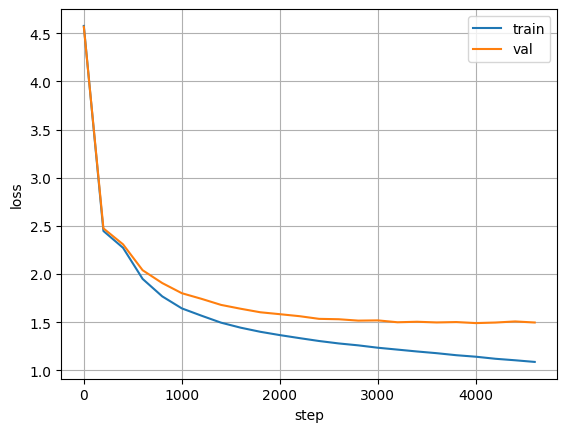

最后 train ppx: 2.9665510043137866  val ppx: 4.466923872381991


In [14]:
import matplotlib.pyplot as plt, math
steps = [0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800,3000,3200,3400,3600,3800,4000,4200,4400,4600]
train = [4.5771,2.4472,2.2727,1.9494,1.7682,1.6433,1.5677,1.4951,1.4430,1.4004,1.3659,1.3346,1.3046,1.2794,1.2594,1.2347,1.2153,1.1958,1.1781,1.1571,1.1414,1.1200,1.1045,1.0874]
val   = [4.5685,2.4743,2.3087,2.0395,1.9065,1.8010,1.7427,1.6796,1.6397,1.6031,1.5831,1.5625,1.5347,1.5307,1.5163,1.5188,1.4993,1.5046,1.4974,1.5014,1.4906,1.4964,1.5079,1.4967]

plt.plot(steps, train, label='train')
plt.plot(steps, val, label='val')
plt.xlabel('step'); plt.ylabel('loss'); plt.legend(); plt.grid(True)
plt.show()

print("最后 train ppx:", math.exp(train[-1]), " val ppx:", math.exp(val[-1]))